In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline


rcParams['figure.figsize'] = 8, 5
COLORS = ['r', 'g', 'b', 'c', 'm', 'y', 'purple', 'lime', 'pink', 'yellow', 'orange', 'brown']


In [6]:
class KMeans:
    def __init__(self, n_clusters=8, max_iter=100, viz=False):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.curr_iter = 0
        self.cluster_centers = None
        self.viz = viz
        
        
    def fit(self, X):
        # Choosing random points as cluster centers.
       
        indices = np.random.choice(X.shape[0], self.n_clusters)
        self.cluster_centers = np.float32(X[indices])
        # print("claster centre")
        print(self.cluster_centers)

        cluster_assignments = self.assign_clusters(X)
        # print("assignment")
        # print(cluster_assignments)
        self.show_clusters(X, cluster_assignments) if self.viz else None
        
        while self.curr_iter < self.max_iter:
            self.curr_iter += 1
            # Update cluster centers using the mean of cluster points.
            self.update_centers(X, cluster_assignments)

            # Assigning new clusters based on the updated cluster centers.
            new_assignments = self.assign_clusters(X)
            
            # If no change, then break.
            flag = np.all(new_assignments == cluster_assignments)
            if (flag):
                break
            
            # Update the cluster assignments.
            cluster_assignments = new_assignments
            self.show_clusters(X, cluster_assignments) if self.viz else None
            
    def update_centers(self, X, cluster_assignments):
        for i in range(self.n_clusters):
            self.cluster_centers[i] = np.mean(X[cluster_assignments == i], axis=0)   
            
    def show_clusters(self, X, cluster_assignments):
        for i in range(self.n_clusters):
            plt.scatter(X[cluster_assignments == i, 0],
                        X[cluster_assignments == i, 1],
                        color=COLORS[i],
                        alpha=0.5)

            plt.scatter(self.cluster_centers[i][0],
                        self.cluster_centers[i][1],
                        color=COLORS[i],
                        s=300,
                        edgecolors='b')
        plt.title(f"Clusters after {self.curr_iter} iterations.")
        #plt.axis('equal')
        plt.show()
        
    def assign_clusters(self, X):
        cluster_assignments = None
        
        min_dist = np.array([float('inf')] * X.shape[0])
        
        for i in range(self.n_clusters):
            # Distance of each point from the ith cluster center.
            dist = np.sqrt(np.sum((X - self.cluster_centers[i])**2, axis=1))
            
            # Assigning ith cluster to the points where distance is lesser
            # than the previous assignment.
            cluster_assignments = np.where(dist < min_dist, i, cluster_assignments)
            
            # Updating the minimum distance for points.
            min_dist = np.where(dist < min_dist, dist, min_dist)
     
        return cluster_assignments
    
    def segment_img(self, img):
        # Convert cluster centers to pixel values.
        clusters = np.uint8(self.cluster_centers)
        # Assign cluster to each pixel.
        cluster_assignments = self.assign_clusters(img)
        # print(cluster_assignments)
        # print(clusters)
        # print(np.uint8(cluster_assignments))

        # Create segmented image with cluster values as pixel values.
        segmented = clusters[np.uint8(cluster_assignments)]
        return segmented
    
    def segment_img_1(self, img):
        # Convert cluster centers to pixel values.
        clusters = np.uint8(self.cluster_centers[:, :3])
        # Assign cluster to each pixel.
        cluster_assignments = self.assign_clusters(img)
        # Create segmented image with cluster values as pixel values.
        segmented = clusters[np.uint8(cluster_assignments)]
        return segmented


In [7]:
from PIL import Image

raw_img = Image.open('Image.jpg')
raw_img = np.asarray(raw_img)
print(raw_img.shape)
img = raw_img.reshape((-1,3))
print(img.shape)

(1067, 1600, 3)
(1707200, 3)


In [8]:
img_vals = np.float32(img)
print(max(img_vals[0]), max(img_vals[1]), max(img_vals[2]))

173.0 160.0 155.0


In [9]:
m2 = KMeans(2, viz=False)
m2.fit(img)

[[248. 171.   0.]
 [ 37.  40.  57.]]


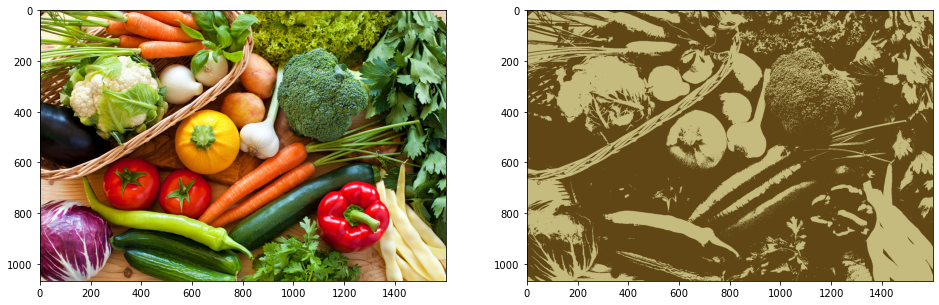

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].imshow(img.reshape((1067, 1600, 3)))
segmented1 = m2.segment_img(img).reshape((1067, 1600, 3))
# print(m2.segment_img(img))
ax[1].imshow(segmented1)

In [10]:
data = np.zeros((raw_img.shape[0], raw_img.shape[1], 5))

for i in range(raw_img.shape[0]):
    for j in range(raw_img.shape[1]):
        pixel = raw_img[i][j]
        data[i][j] = np.array([pixel[0], pixel[1], pixel[2], i, j])

data = data.reshape((-1, 5))

In [11]:
data.max()

1599.0

In [12]:
scaler = MinMaxScaler(feature_range=(0,255))
data_new = scaler.fit_transform(data)

In [18]:
m5 = KMeans(40, viz=False)
m5.fit(data_new)

[[228.        193.        165.        160.51126     4.7842402]
 [133.        171.         10.          3.348968   35.403378 ]
 [169.        122.         70.         53.58349   117.21388  ]
 [230.        209.        130.        241.84334   237.61726  ]
 [ 22.          4.          2.        138.98218     7.814259 ]
 [ 39.         70.          2.        239.92964    95.20638  ]
 [238.        239.        221.         60.75985    67.29831  ]
 [216.        220.        187.         72.24203    73.51782  ]
 [124.          4.          5.        194.24014    95.20638  ]
 [216.        160.        125.         70.56754   116.257034 ]
 [213.         87.         37.        136.82927   165.05629  ]
 [ 46.         36.          9.        159.3152    173.50844  ]
 [ 56.         38.          0.        165.05629    31.41651  ]
 [105.        166.         73.        176.53847   253.40526  ]
 [ 98.         81.         35.        251.89024    72.08255  ]
 [255.        128.         47.        172.23265   143.5

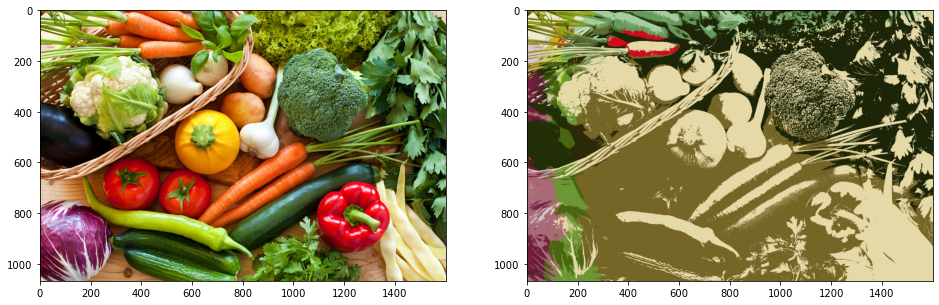

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].imshow(img.reshape((1067, 1600, 3)))
segmented1 = m5.segment_img_1(data).reshape((1067, 1600, 3))
ax[1].imshow(segmented1)

In [4]:
data = np.zeros((raw_img.shape[0], raw_img.shape[1], 5))

for i in range(raw_img.shape[0]):
    for j in range(raw_img.shape[1]):
        pixel = raw_img[i][j]
        data[i][j] = np.array([pixel[0], pixel[1], pixel[2], i, j])

data = data.reshape((-1, 5))

NameError: name 'raw_img' is not defined

In [3]:
scaler = MinMaxScaler(feature_range=(0,255))
data_new = scaler.fit_transform(data[:3])

NameError: name 'data' is not defined

In [22]:
m5 = KMeans(100, viz=False)
m5.fit(data_new)

[[100.        128.         80.         79.6576    184.35272  ]
 [138.         83.          3.        220.79268   213.21764  ]
 [  4.          4.          2.        116.257034   30.619137 ]
 [226.        137.         81.          2.8705442  55.497185 ]
 [159.        182.         12.         61.238274   23.442778 ]
 [ 33.          6.          0.        113.14728    79.41839  ]
 [  3.         13.          5.        117.21388   246.2289   ]
 [249.          5.         30.        168.88368   195.8349   ]
 [ 98.         40.          3.        138.50375    71.28518  ]
 [  6.          9.          0.         59.085365  231.23828  ]
 [ 41.          2.          0.         83.96342   139.22139  ]
 [125.         33.         70.        231.79643    14.990619 ]
 [ 51.         72.         55.         89.22608   194.87805  ]
 [243.        255.        207.          6.219512   54.22139  ]
 [ 57.         73.         10.        173.66792    88.82739  ]
 [ 52.         64.          0.        252.84709    75.2

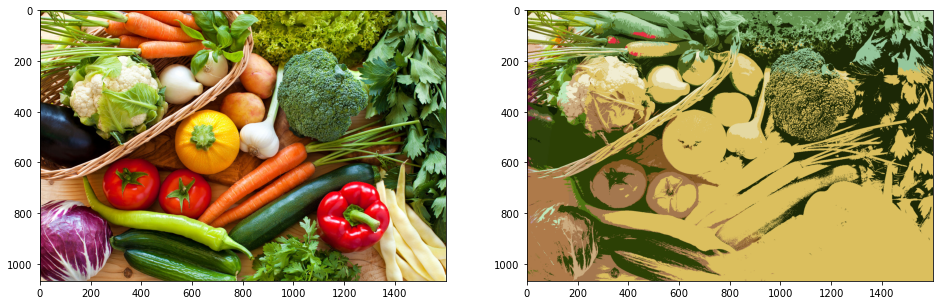

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].imshow(img.reshape((1067, 1600, 3)))
segmented1 = m5.segment_img_1(data).reshape((1067, 1600, 3))
ax[1].imshow(segmented1)

In [25]:
data = np.zeros((raw_img.shape[0], raw_img.shape[1], 5))

for i in range(raw_img.shape[0]):
    for j in range(raw_img.shape[1]):
        pixel = raw_img[i][j]
        data[i][j] = np.array([pixel[0], pixel[1], pixel[2], i, j])

data = data.reshape((-1, 5))

In [26]:
scaler = MinMaxScaler(feature_range=(0,255))
data_new = scaler.fit_transform(data)

In [27]:
m5 = KMeans(50, viz=False)
m5.fit(data_new)

[[159.         75.         28.        144.48405   166.33208  ]
 [ 71.         96.         54.         80.85366   170.95685  ]
 [ 53.         70.         18.         83.24578   231.7167   ]
 [138.          0.         16.        181.56192    66.34146  ]
 [ 80.        108.         34.        254.52158   197.42964  ]
 [126.        164.        117.        130.84897   195.99437  ]
 [ 67.          0.         23.        188.02065    25.834896 ]
 [114.         41.          0.        161.2289    114.502815 ]
 [209.        115.          2.        130.84897   108.123825 ]
 [126.         48.          0.        143.288     124.23077  ]
 [ 57.         20.          1.        125.5863     79.41839  ]
 [ 70.         34.         18.        147.83302     5.2626643]
 [244.        246.        243.        117.453094  134.43715  ]
 [142.         61.          8.        144.00563   124.70919  ]
 [ 58.         86.         46.         93.29269   188.81801  ]
 [183.        135.         95.        243.27861   206.9

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].imshow(img.reshape((1067, 1600, 3)))
segmented1 = m5.segment_img_1(data).reshape((1067, 1600, 3))
ax[1].imshow(segmented1)